# Overview

League of Legends is a game I have been playing for over 13 years. 

It is a MOBA(multiplayer online battle arena) where 10 split up into teams of 5 and attempt to destroy the enemy team's base. The base is made up of 3 outer towers, 3 middle towers, 3 inner towers, 2 inhibitors, 2 nexus towers, and the final target which is the nexus. 

Each person on a team has to select a champion and a role which determines where they go on the map. 

## Problem Framing and Big Picture

In this project I will be taking a data-driven approach to analyze this data set and predict champion Win % based on Name, Class, Role, Tier, Score, Trand, Role, Pick %, Ban %, and KDA. I will take you through the steps of Getting the Data, Exploring the Data, Preparing the Data, and then using various Models to determine which is the best at predicting the target. 

I will be using a regression task to predict the Win % by using a model to predict the Win %. The performance of my model will be evaluted with cross validation and neg mean squared error. 

## Get the Data

This data set comes from Kaggle. 
Here is the link for anyone interested: https://www.kaggle.com/datasets/vivovinco/league-of-legends-stats-s13

### List of features

1. Name: Name of the champion
2. Class: Champion's type (Fighter, Assassin, Mage, Marksman, Support, Tank)
3. Role: Champion's location (Top, Mid, ADC, Support, Jungle)
4. Tier: How good the champion is (God, S, A, B, C, D)
5. Score: Overall champion score
6. Trend: Trend of the score
8. Win %: Champion win rate
9. Role %: Role rate is played with champion
10. Pick %: Champion pick rate
11. Ban %: Champion ban rate
12. KDA: (Kill+Death)/Assists ratio. 

### Target

I will be predicting Win %

### Importing Data 

In [25]:
import numpy as np
import pandas as pd

In [31]:
#making a path to import the data

path =  r'D:\League of Legends Champion Stats 13.13.csv'
league = pd.read_csv(path)

#checking the output

league

#it is very hard to read. the columns are separated by ;s

,Name;Class;Role;Tier;Score;Trend;Win %;Role %;Pick %;Ban %;KDA
0,Aatrox;Fighter;TOP;God;71.25;-3.39;48.84%;92.2...
1,Ahri;Mage;MID;God;77.12;-5.03;50.90%;95.23%;10...
2,Akali;Assassin;MID;A;55.37;-5.08;48.18%;78.45%...
3,Akali;Assassin;TOP;C;36.35;-0.6;48.50%;20.39%;...
4,Akshan;Marksman;MID;B;47.25;-1.5;50.15%;69.32%...
...,...
242,Zilean;Support;MID;A;52.02;4.9;53.91%;13.72%;0...
243,Zilean;Support;SUPPORT;B;45.21;1.15;50.12%;82....
244,Zoe;Mage;MID;A;49.82;1.34;50.44%;86.34%;2.98%;...
245,Zoe;Mage;SUPPORT;D;32.21;-1.45;48.67%;11.43%;0...


In [32]:
#loaded the dataset again but separated the columns based on the ;

league_fixed = pd.read_csv(path, sep = ';')

#checking to make sure that the columns have been fixed

league_fixed

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,71.25,-3.39,48.84%,92.28%,7.01%,5.81%,1.85
1,Ahri,Mage,MID,God,77.12,-5.03,50.90%,95.23%,10.63%,6.47%,2.63
2,Akali,Assassin,MID,A,55.37,-5.08,48.18%,78.45%,5.99%,8.10%,2.30
3,Akali,Assassin,TOP,C,36.35,-0.60,48.50%,20.39%,1.45%,8.10%,2.06
4,Akshan,Marksman,MID,B,47.25,-1.50,50.15%,69.32%,2.88%,5.94%,2.16
...,...,...,...,...,...,...,...,...,...,...,...
242,Zilean,Support,MID,A,52.02,4.90,53.91%,13.72%,0.31%,0.76%,3.52
243,Zilean,Support,SUPPORT,B,45.21,1.15,50.12%,82.08%,2.11%,0.76%,3.03
244,Zoe,Mage,MID,A,49.82,1.34,50.44%,86.34%,2.98%,1.93%,2.60
245,Zoe,Mage,SUPPORT,D,32.21,-1.45,48.67%,11.43%,0.40%,1.97%,2.11


### Data Size and Type 

In [33]:
#checking the size and type of the data

league_info = league_fixed.info()

#checking the output 

league_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    247 non-null    object 
 1   Class   247 non-null    object 
 2   Role    247 non-null    object 
 3   Tier    247 non-null    object 
 4   Score   247 non-null    float64
 5   Trend   247 non-null    float64
 6   Win %   247 non-null    object 
 7   Role %  247 non-null    object 
 8   Pick %  247 non-null    object 
 9   Ban %   247 non-null    object 
 10  KDA     247 non-null    float64
dtypes: float64(3), object(8)
memory usage: 21.4+ KB


In [43]:
#some of the columns with numerical values are objects 
#converting to floats

convert_cols = ['Win %', 'Role %', 'Pick %', 'Ban %']

league_fixed[convert_cols] = league_fixed[convert_cols].replace('%', '',
                                                               regex = True).astype(float)

### Data Splitting

In [44]:
#separate the target from the rest of the data 

features = league_fixed.drop('Win %', axis = 1)

target = league_fixed['Win %']

In [45]:
#splitting the data into a test and train sets

from sklearn.model_selection import train_test_split

#80% of the data will be for training and 20% for testing
#42 random state allows reproducibility 

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                   test_size = 0.2,
                                                   random_state = 42)

## Data Exploration

This section will involve some exploration into the dataset. 

### Attribute Characteristics

I will be studying the characteristics of the numerical and categorical data.

#### Numerical Data

In [46]:
#checking the statistics of the numerical data

X_train.describe()

,Score,Trend,Role %,Pick %,Ban %,KDA
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,49.866142,-0.178173,59.149695,3.836294,5.311168,2.281878
std,14.303269,4.877184,33.250034,3.771420,5.693125,0.406915
min,20.780000,-23.490000,10.070000,0.140000,0.180000,1.320000
25%,40.100000,-2.150000,20.390000,1.120000,1.360000,1.990000
50%,47.230000,0.010000,71.730000,2.870000,3.140000,2.250000
75%,56.430000,2.210000,89.550000,5.100000,5.980000,2.550000
max,92.980000,13.940000,99.390000,28.670000,23.800000,3.580000


1. Count: The total number of values in each column. Does not include null values.
2. Mean: The average per column. Trend has a negative average meaning there is a decrease over time. 
3. STD: The vartion in a set of values. The higher, the more spread out the values are.
4. Min: The lowest value
5. 25%: First Quartile indicating where 25% of the data is.
6. 50%: Middle indicating the split of the dat.
7. 75%: Third Quartile indicatiing where 75% of the data is. 
8. Max: The highst value

#### Categorical Data

In [47]:
#indicating the categorical columns to analyze 

cat_cols = X_train.select_dtypes(include = 'object')

#using a function that will provide the value counts for categorical columns

def value_counts (categorical):
    for column in categorical.columns:
        print(f"Totals for {column}:\n{categorical[column].value_counts(normalize = True)}\n")
        
#passing the cat_cols to the function
        
value_counts(cat_cols)

Totals for Name:
Veigar      0.015228
Rumble      0.015228
Pantheon    0.015228
Ziggs       0.015228
Karthus     0.015228
              ...   
Orianna     0.005076
Karma       0.005076
Aatrox      0.005076
Rek'Sai     0.005076
Sylas       0.005076
Name: Name, Length: 134, dtype: float64

Totals for Class:
Fighter     0.304569
Mage        0.233503
Tank        0.157360
Marksman    0.142132
Assassin    0.106599
Support     0.055838
Name: Class, dtype: float64

Totals for Role:
TOP        0.269036
MID        0.243655
JUNGLE     0.192893
SUPPORT    0.177665
ADC        0.116751
Name: Role, dtype: float64

Totals for Tier:
B      0.279188
A      0.233503
S      0.147208
C      0.137056
D      0.101523
God    0.101523
Name: Tier, dtype: float64



Each category is sorted from highest to lowest. For name, there are different values because some names appear more than once. This is because some champions are suitable for different roles and were listed more than once.

### Visuals

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

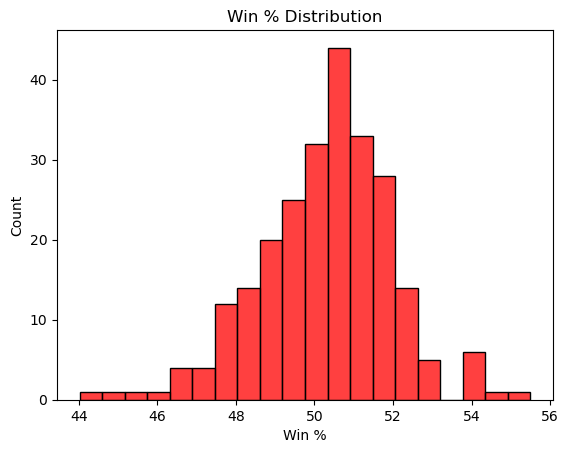

In [59]:
#Graphing the distributioin of Win %

sns.histplot(league_fixed['Win %'], bins = 20, color ='red')
plt.title('Win % Distribution')
plt.xlabel('Win %')
plt.show()

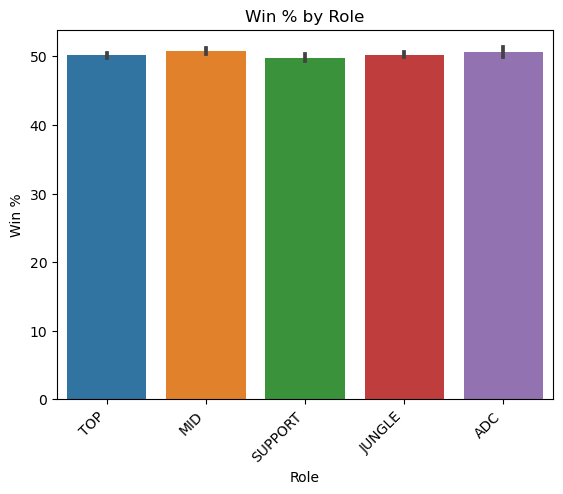

In [61]:
#Graphing the Win % by Role

sns.barplot(x = 'Role', y = 'Win %' , data = league_fixed)
plt.title('Win % by Role')
plt.xticks(rotation = 45, ha= 'right')
plt.show()

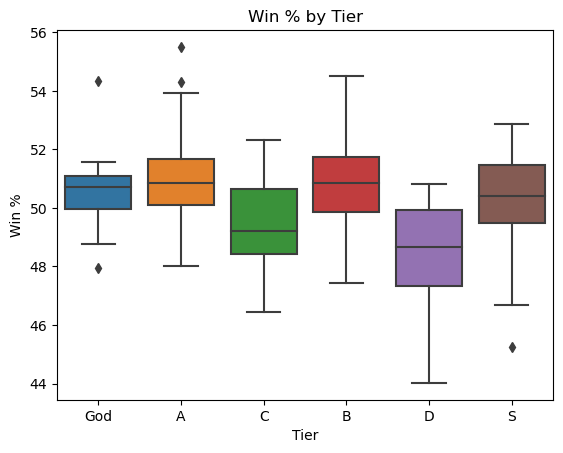

In [64]:
#Making a boxplot to show Win % across Tiers 

sns.boxplot(x = 'Tier' , y = 'Win %', data = league_fixed)
plt.title('Win % by Tier')
plt.show()

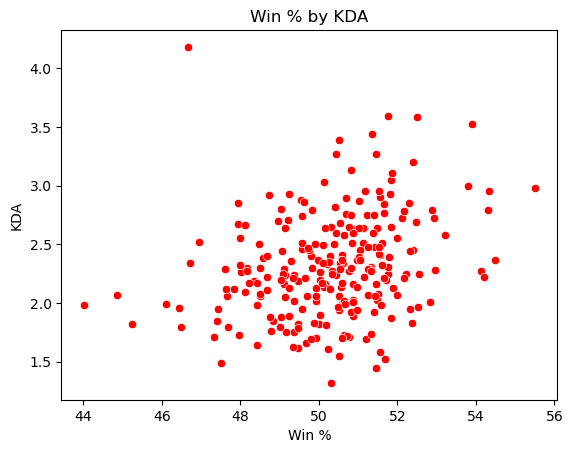

In [65]:
#Scatterplot to show the relationship of Win % and KDA

sns.scatterplot (x = 'Win %' , y = 'KDA', data = league_fixed, color = 'red')
plt.title('Win % by KDA')
plt.xlabel('Win %')
plt.ylabel('KDA')
plt.show()

### Correlations

I will check and see if there are any correlations between discrete and continuous attributes.

In [67]:
#separating the numerical data

continuous = ['Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']

#create a correlation matrix 

matrix = league_fixed[continuous].corr()

#check correlation in relation to Win %, which is our target
#ranking it from greatest to least

matrix['Win %'].sort_values(ascending = False)

Win %     1.000000
Trend     0.296357
KDA       0.275386
Score     0.233733
Role %    0.001105
Pick %   -0.054927
Ban %    -0.079649
Name: Win %, dtype: float64

There is a positive correlation between all of the values besides Pick % and Ban %. The correlations are very low in both directions. 

## Preparing Data 

Getting the data ready for machine learning

In [70]:
#Checking the data for missing values

missing = league_fixed.isnull().sum()
missing

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

### Preprocessing

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Separate continuous and categorical into separate lists

numerical =['Score', 'Trend', 'Role %', 'Pick %', 'Ban %', 'KDA']

categorical = ['Name', 'Class', 'Role', 'Tier']

#Identify the transformers that we will use on the data 
#Numerical Data will be put through a StandardScaler
#Categorical Data will be put through a OneHotEncoder

cont_trans = StandardScaler()
cat_trans = OneHotEncoder(drop = 'first', sparse = False, handle_unknown = 'ignore')

In [133]:
#Use a column transformer to process the data

preprocessor = ColumnTransformer(transformers = [
    ('numeric', cont_trans, numerical),
    ('categorical', cat_trans, categorical)])

### Transform the Train Set

In [134]:
#Fitting and transforming the train data with the Transformer

X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 3.07409502e-03,  6.94412923e-01,  8.05966312e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.99018013e-01,  3.55240991e-01,  1.94789694e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.59302645e-01, -4.13548721e-01, -6.60616357e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.13225964e+00, -4.47333397e+00,  9.35618974e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.30791373e-01, -7.02656142e-02, -8.72281866e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.06501621e-01, -2.36768199e-01, -1.41290331e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## Model Use

Here I will fit the data to a few models.

In [118]:
#Fitting the data to a Linear Regression Model

from sklearn.linear_model import LinearRegression

#Make an instance

linear = LinearRegression()

#Fit the training data to the model

linear.fit(X_train_transformed, y_train)

#Check the output

linear

LinearRegression()

In [119]:
#Fitting the data to a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

#Make an instance

forest = RandomForestRegressor(random_state = 42)

#Fit the training data to the Regressor

forest.fit(X_train_transformed, y_train)

#Check the output

forest

RandomForestRegressor(random_state=42)

In [120]:
#Fitting the data to a Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

#Make an instance 

gradient = GradientBoostingRegressor(random_state = 42)

#Fit the training data to the Regressor

gradient.fit(X_train_transformed, y_train)

#Checking the output

gradient

GradientBoostingRegressor(random_state=42)

### Model Performance

I will be using cross-validation to check the performance of each model.

In [121]:
from sklearn.model_selection import cross_val_score

#Cross validation for Linear Regression Model 

linear_rmse = -cross_val_score(linear, X_train_transformed, y_train, cv = 10,
                               scoring = 'neg_root_mean_squared_error')

#Check the output

linear_rmse

array([4.00626220e+13, 3.85636765e+13, 8.40607980e+12, 1.62427844e+11,
       2.36327514e+13, 6.84080397e+12, 4.16224882e+13, 3.13851932e+13,
       6.43262633e+11, 8.66928903e+12])

In [122]:
#Cross validation for Random Forest Regressor

forest_rmse = -cross_val_score(forest, X_train_transformed, y_train, cv = 10,
                                scoring = 'neg_root_mean_squared_error')

#Check the output

forest_rmse

array([0.86467193, 1.39414783, 1.75816498, 1.26573857, 1.01450192,
       1.05475958, 1.20388625, 1.06062559, 1.1180473 , 1.56934042])

In [123]:
#Cross Validation for Gradient Boosting Regressor

gradient_rmse = -cross_val_score(gradient, X_train_transformed, y_train, cv = 10,
                                scoring = 'neg_root_mean_squared_error')

#Check the output

gradient_rmse

array([0.75181298, 1.45134284, 1.75702124, 1.2441558 , 0.99454023,
       0.94207365, 1.27873081, 0.90531902, 1.079582  , 1.61101738])

### Model Comparison

Here, we will check the stats of each model above to examine the stats of each.

In [124]:
pd.Series(linear_rmse).describe()

count    1.000000e+01
mean     1.999886e+13
std      1.687092e+13
min      1.624278e+11
25%      7.232123e+12
50%      1.615102e+13
75%      3.676906e+13
max      4.162249e+13
dtype: float64

In [125]:
pd.Series(forest_rmse).describe()

count    10.000000
mean      1.230388
std       0.273830
min       0.864672
25%       1.056226
50%       1.160967
75%       1.362046
max       1.758165
dtype: float64

In [126]:
pd.Series(gradient_rmse).describe()

count    10.000000
mean      1.201560
std       0.326846
min       0.751813
25%       0.955190
50%       1.161869
75%       1.408190
max       1.757021
dtype: float64

## Fine Tuning

Using a Grid Search to fine tune my hyperparameters. I chose the Random Forest Regressor model.

In [127]:
from sklearn.model_selection import GridSearchCV

#Create a dictionary for the hyperparameters. 

forest_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

#Initiate the model

Forest_model = RandomForestRegressor(random_state = 42)

#Initiate the Grid Search

grid = GridSearchCV(Forest_model, forest_param_grid, verbose = 1, cv = 10,
                   scoring = 'neg_mean_squared_error', n_jobs = -1)

#fit the Grid Search and keep the best parameters

grid.fit(X_train_transformed, y_train)
print("The best parameters are:" , grid.best_params_)

#Saving the best model from the Grid Search

best_forest = grid.best_estimator_

Fitting 10 folds for each of 81 candidates, totalling 810 fits
The best parameters are: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


### Transform Test Data 

In [128]:
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[-0.73569783, -0.50605016,  0.40585217, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31288168,  0.98219517,  1.09813708, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78125777, -0.33338081,  0.10765104, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.48827232,  1.42209089,  1.14668145, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93616156,  0.24218368,  1.01853637, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23755807, -0.26143525, -1.43883385, ...,  1.        ,
         0.        ,  0.        ]])

### Predictions 

In [129]:
#Use the test set to predict Win %

predictions = best_forest.predict(X_test_transformed)
predictions

array([48.60126066, 50.75392631, 50.12748488, 49.57698681, 50.82405563,
       49.91330942, 49.83920336, 50.91390134, 51.41825238, 50.92380987,
       49.65568807, 48.37226988, 49.96522918, 50.89211148, 51.11860845,
       49.07877925, 49.36201307, 49.10405502, 48.22292377, 49.2151462 ,
       50.03264509, 50.50244187, 50.3076873 , 50.84901921, 48.49198606,
       50.43568252, 49.23543932, 47.67700394, 50.67795616, 50.30782178,
       51.33108601, 54.00278495, 50.93992169, 50.8374604 , 50.87012814,
       49.87321919, 50.14319399, 50.07687804, 50.81078318, 50.48548344,
       50.83064559, 51.07213423, 49.74815528, 51.48466099, 51.11729189,
       50.8967186 , 49.56687971, 49.41250059, 49.12459021, 48.86861675])

In [131]:
#Checking the performance of my predictions 

from sklearn.metrics import mean_squared_error

prediction_check = np.sqrt(mean_squared_error(y_test, predictions))
prediction_check

1.210679430597733

# Conclusion

The RMSE of 1.21 is a very good number. The lower the number, the better as 0 would indicate perfect predictions. 

The biggest factors are Trend and KDA which are not much of a champion issue but a player issue. KDA is dependent on how well a player uses the champion and performs during the matches. A higher KDA produces a higher Win % which can be seen in the Scatterplot above. 